## Project submission 1
#### Emily Mosquera and Dominique Farfán

### General description of the database, including size, data types, null/blank values, outliers, atypical values.

In [1]:
#Call libraries
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

# Algorithm
# !pip install xgboost
# !pip install catboost

In [2]:
#Import the dataset
df=pd.read_csv("SEER Breast Cancer Dataset .csv")
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,10,White,Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,16,1,69,Alive
1,30,White,Single (never married),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,28,Positive,Positive,19,7,74,Alive
2,30,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N1,IIB,Moderately differentiated; Grade II,Regional,25,Positive,Positive,15,3,78,Alive
3,31,White,Divorced,NaN,T2,N1,IIB,Moderately differentiated; Grade II,Regional,42,Positive,Positive,9,3,5,Alive
4,31,Black,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,30,Positive,Positive,16,1,52,Alive


In [3]:
# Let's remove the unnecessary columns using drop()
df.drop(['Unnamed: 3'], axis=1, inplace=True)

In [4]:
#Check the database size
df.shape

(4024, 15)

In [5]:
#Lets check data type 
print(df.dtypes) 

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Regional Node Positive     int64
Survival Months            int64
Status                    object
dtype: object


In [6]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.975398,32.834742,14.357107,4.529324,71.297962
std,9.010704,109.217549,8.099675,18.264337,22.921430
min,10.000000,0.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,102.000000,5400.000000,61.000000,1000.000000,107.000000


### Treat null values

In [7]:
#Check for null values in each column
print(df.isnull().sum())

Age                        0
Race                      13
Marital Status             0
T Stage                    0
N Stage                    0
6th Stage                  0
Grade                      0
A Stage                    0
Tumor Size                 0
Estrogen Status            0
Progesterone Status        0
Regional Node Examined     0
Regional Node Positive     0
Survival Months            0
Status                     0
dtype: int64


Treat null values by eliminating them because there are just 13 in the column 'Race'

In [8]:
df.keys()

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [9]:
df.rename(columns={'Race ':'Race'}, inplace=True)
df.rename(columns={'T Stage ':'T Stage'}, inplace=True)

In [10]:
#Eliminate null values
df = df[df["Race"].notnull()]

### Treat outliers with Winsorization

In [11]:
#Function to detect outliers before Winsorization
def detect_outliers(df):
    Q1 = df.quantile(0.25)  # First quartile (25th percentile)
    Q3 = df.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound

In [12]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Get lower and upper bounds
lower_bound, upper_bound = detect_outliers(df[numeric_columns])

# Count outliers before Winsorization
outliers = (df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)

# Print number of outliers per column
print("Outliers before Winsorization:\n", outliers.sum())

Outliers before Winsorization:
 Age                         2
Tumor Size                224
Regional Node Examined     72
Regional Node Positive    346
Survival Months            18
dtype: int64


In [13]:
def winsorize(df, columns):
    df_winsorized = df.copy()  # Copy the original DataFrame
    
    # Select only the specified columns
    selected_cols = df[columns]
    
    # Calculate the IQR bounds
    Q1 = selected_cols.quantile(0.25)
    Q3 = selected_cols.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Apply Winsorization (clip values within bounds) only to selected columns
    df_winsorized[columns] = selected_cols.clip(lower_bound, upper_bound, axis=1)
    
    return df_winsorized

# Specify the columns you want to Winsorize
columns_to_winsorize = ['Tumor Size', 'Regional Node Positive']

# Apply function
df = winsorize(df, columns_to_winsorize)

In [14]:
#Count outliers after Winsorization
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Get lower and upper bounds
lower_bound, upper_bound = detect_outliers(df[numeric_columns])

# Count outliers after Winsorization
outliers = (df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)

# Print number of outliers per column
print("Outliers after Winsorization:\n", outliers.sum())

Outliers after Winsorization:
 Age                        2
Tumor Size                 0
Regional Node Examined    72
Regional Node Positive     0
Survival Months           18
dtype: int64


In [15]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months
count,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000
mean,53.980803,29.371229,14.363750,3.574171,71.278484
std,9.013422,17.795291,8.104004,3.287272,22.939332
min,10.000000,0.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,102.000000,71.000000,61.000000,11.000000,107.000000


In [16]:
df['Tumor Size'].unique()

array([ 9, 28, 25, 42, 30, 65, 71, 10, 45, 19, 55, 40, 35, 50, 15, 68, 11,
       20, 17, 48,  8, 12, 14, 57, 16, 27, 24, 32, 13, 21, 22, 29, 36, 51,
       23, 18,  7, 52, 60, 70, 34,  2, 33, 31, 58, 44, 63, 26,  6, 37, 64,
        3, 53, 38,  5, 59, 61, 39,  0,  4, 43, 41, 54, 62, 46,  1, 69, 47,
       56, 66, 49, 67], dtype=int64)

### Treat outiers in categorical variables

In [17]:
df_cat = df.select_dtypes(include=['object'])
for col in df_cat.columns:
    print(f"Unique values in '{col}':")
    print(df_cat[col].unique())
    print()  # Adding a newline for better readability

Unique values in 'Race':
['White' 'Other (American Indian/AK Native, Asian/Pacific Islander)'
 'Black']

Unique values in 'Marital Status':
['Married (including common law)' 'Single (never married)' 'Divorced'
 'Widowed' 'Separated' 'Split up']

Unique values in 'T Stage':
['T1' 'T2' 'T3' 'T4']

Unique values in 'N Stage':
['N1' 'N2' 'N3']

Unique values in '6th Stage':
['IIA' 'IIIA' 'IIB' 'IIIC' 'IIIB']

Unique values in 'Grade':
['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV'
 'jluky' 'cfjfdit' 'ijkhliuy' 'cfhgdk' 'jjjjj']

Unique values in 'A Stage':
['Regional' 'Distant']

Unique values in 'Estrogen Status':
['Positive' 'Negative']

Unique values in 'Progesterone Status':
['Positive' 'Negative' 'Neutral']

Unique values in 'Status':
['Alive' 'Not dead' 'Dead']



In [18]:
# Define values to remove
values1= ['jluky', 'cfjfdit', 'ijkhliuy', 'cfhgdk', 'jjjjj']
values2= ['Neutral']

# Filter out those values
df = df[~df['Grade'].isin(values1)]
df = df[~df['Progesterone Status'].isin(values2)]

In [19]:
# Merge 'split up' into 'divorced'
df['Marital Status'] = df['Marital Status'].replace('Split up', 'Separated')
# Merge 'split up' into 'divorced'
df['Status'] = df['Status'].replace('Not dead', 'Alive')

In [20]:
df['Grade'].unique()

array(['Moderately differentiated; Grade II',
       'Poorly differentiated; Grade III', 'Well differentiated; Grade I',
       'Undifferentiated; anaplastic; Grade IV'], dtype=object)

In [21]:
df['Status'].unique()

array(['Alive', 'Dead'], dtype=object)

In [22]:
df['Progesterone Status'].unique()

array(['Positive', 'Negative'], dtype=object)

### Check correlations

First, it is needed to handle categorical variables: create dummy variables

In [23]:
# Predictive variables
predictors = ['Age', 'Race', 'Marital Status', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months']

# Response variable
outcome = 'Status'

# Get dummies variables from the categorical predictive variables
X = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]

#Print the result
X

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Widowed,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive
0,10,9,16,1,69,False,True,True,False,False,False,True,True,True
1,30,28,19,7,74,False,True,False,False,True,False,True,True,True
2,30,25,15,3,78,True,False,True,False,False,False,True,True,True
3,31,42,9,3,5,False,True,False,False,False,False,True,True,True
4,31,30,16,1,52,False,False,True,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,69,60,21,9,82,False,True,True,False,False,False,True,True,True
4019,69,71,12,1,83,False,True,False,False,False,False,True,True,True
4020,69,16,12,6,85,False,True,True,False,False,False,True,True,True
4021,69,55,13,2,86,False,True,False,False,True,False,True,True,True


### Categorical variables - ordinal 

In [24]:
# Define the order of the categories 
#(T Stage)
order = ['T1', 'T2', 'T3', 'T4']
#(N Stage)
order1 = ['N1', 'N2', 'N3']
#(6th Stage)
order2 = ['IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC']
#(Grade)
order3 = ['Well differentiated; Grade I', 'Moderately differentiated; Grade II', 'Poorly differentiated; Grade III', 'Undifferentiated; anaplastic; Grade IV']

# Apply ordinal coding
df['T Stage'] = df['T Stage'].map({cat: idx for idx, cat in enumerate(order)})
df['N Stage'] = df['N Stage'].map({cat: idx for idx, cat in enumerate(order1)})
df['6th Stage'] = df['6th Stage'].map({cat: idx for idx, cat in enumerate(order2)})
df['Grade'] = df['Grade'].map({cat: idx for idx, cat in enumerate(order3)})

# Print dataframe
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,10,White,Married (including common law),0,0,0,1,Regional,9,Positive,Positive,16,1,69,Alive
1,30,White,Single (never married),1,1,2,1,Regional,28,Positive,Positive,19,7,74,Alive
2,30,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),1,0,1,1,Regional,25,Positive,Positive,15,3,78,Alive
3,31,White,Divorced,1,0,1,1,Regional,42,Positive,Positive,9,3,5,Alive
4,31,Black,Married (including common law),1,0,1,2,Regional,30,Positive,Positive,16,1,52,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,69,White,Married (including common law),2,0,2,2,Regional,60,Positive,Positive,21,9,82,Dead
4019,69,White,Divorced,2,0,2,1,Regional,71,Positive,Positive,12,1,83,Dead
4020,69,White,Married (including common law),0,1,2,2,Regional,16,Positive,Positive,12,6,85,Dead
4021,69,White,Single (never married),2,0,2,1,Regional,55,Positive,Positive,13,2,86,Dead


In [25]:
df_final = pd.concat([X, df[['T Stage', 'N Stage', '6th Stage', 'Grade']]], axis=1)

# Show the data frame
df_final.head()

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Widowed,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,T Stage,N Stage,6th Stage,Grade
0,10,9,16,1,69,False,True,True,False,False,False,True,True,True,0,0,0,1
1,30,28,19,7,74,False,True,False,False,True,False,True,True,True,1,1,2,1
2,30,25,15,3,78,True,False,True,False,False,False,True,True,True,1,0,1,1
3,31,42,9,3,5,False,True,False,False,False,False,True,True,True,1,0,1,1
4,31,30,16,1,52,False,False,True,False,False,False,True,True,True,1,0,1,2


In [26]:
df_final.dtypes

Age                                                               int64
Tumor Size                                                        int64
Regional Node Examined                                            int64
Regional Node Positive                                            int64
Survival Months                                                   int64
Race_Other (American Indian/AK Native, Asian/Pacific Islander)     bool
Race_White                                                         bool
Marital Status_Married (including common law)                      bool
Marital Status_Separated                                           bool
Marital Status_Single (never married)                              bool
Marital Status_Widowed                                             bool
A Stage_Regional                                                   bool
Estrogen Status_Positive                                           bool
Progesterone Status_Positive                                    

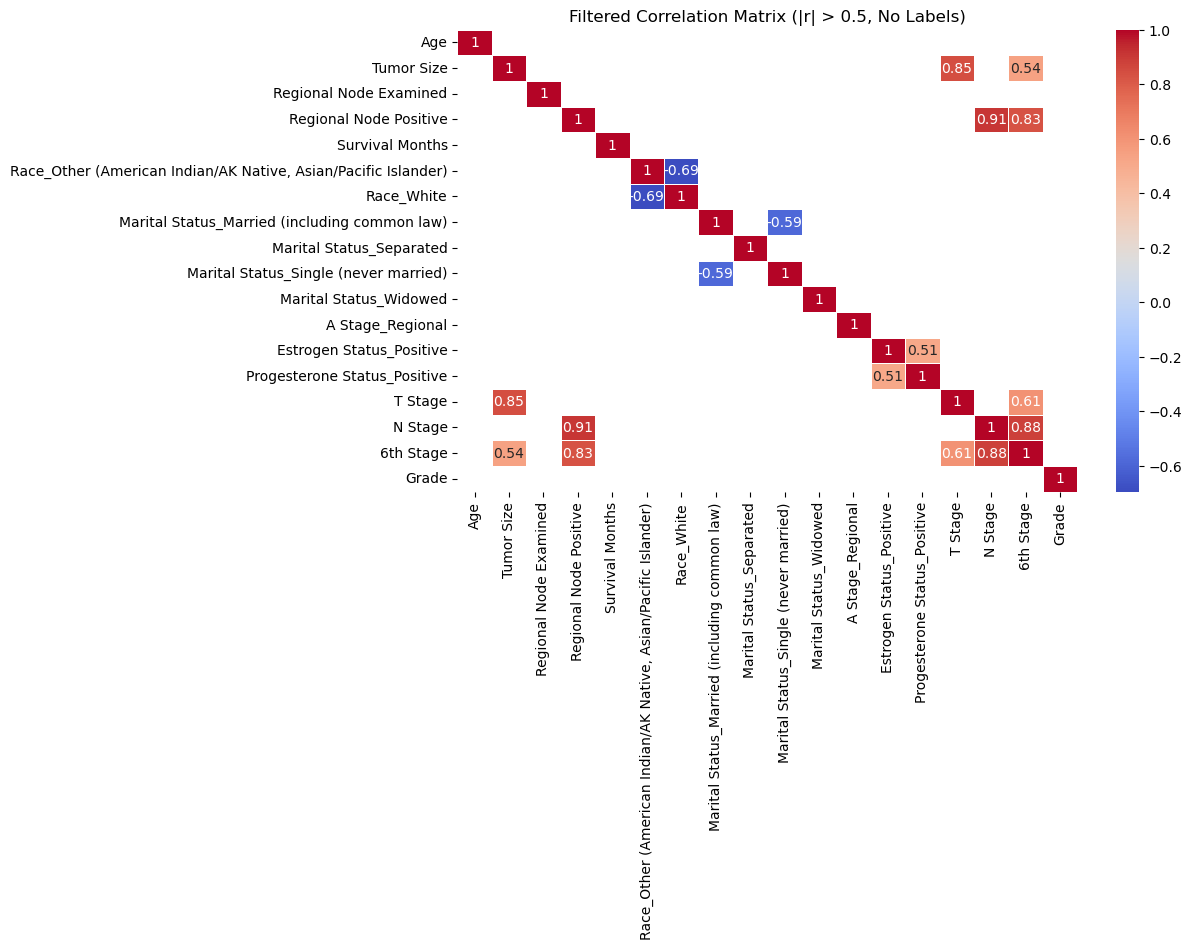

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_final.corr()

# Set threshold for strong correlations
threshold = 0.5

# Create a mask to hide weak correlations
mask = (corr_matrix < threshold) & (corr_matrix > -threshold)

# Plot heatmap with mask and without labels
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, mask=mask, annot=True, cbar=True)

# Add title
plt.title("Filtered Correlation Matrix (|r| > 0.5, No Labels)")

plt.show()


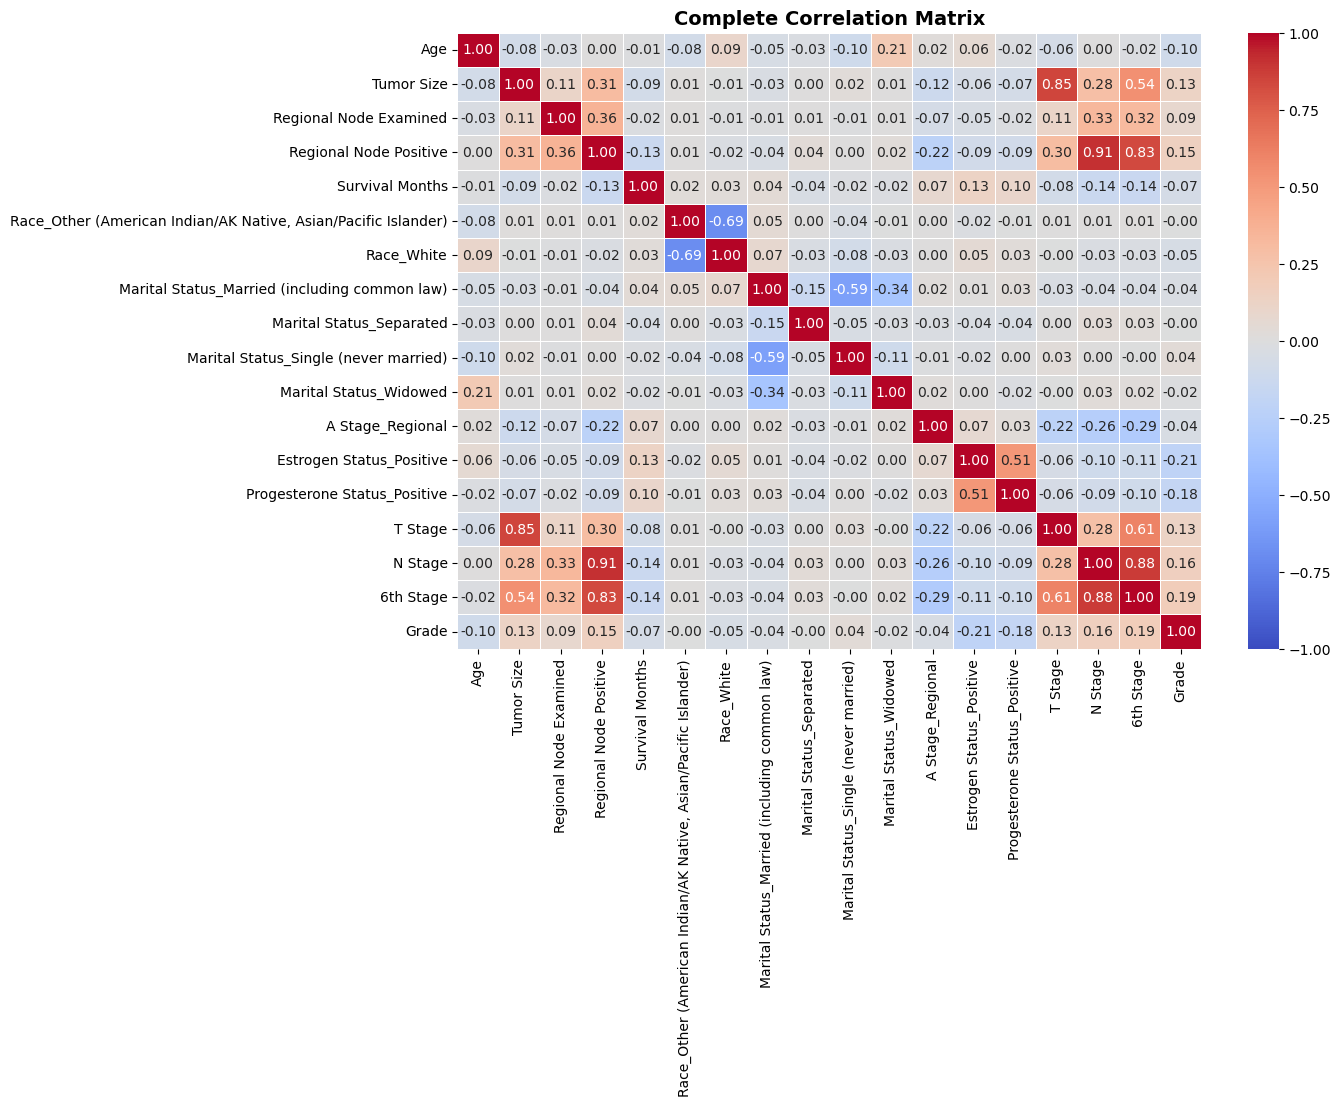

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df_final.corr()

# Graph configuration
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    cmap="coolwarm",  # For visualizing better positive/negative
    linewidths=0.5, 
    annot=True,  # Show values
    fmt=".2f",  # Round to 2 decimals
    cbar=True,  # Show color bar
    vmin=-1, vmax=1,  # Range of correlation
)

# Title
plt.title("Complete Correlation Matrix", fontsize=14, fontweight="bold")

# Show image
plt.show()


In [29]:
import pandas as pd
import numpy as np

# Compute correlation matrix
corr_matrix = df_final.corr()

# Set threshold for strong correlations
threshold = 0.5

# Create a mask for the upper triangle (excluding diagonal)
mask = np.triu(np.ones(corr_matrix.shape), k=0).astype(bool)

# Apply the mask to get only the upper triangle
filtered_corr = corr_matrix.where((corr_matrix > threshold) | (corr_matrix < -threshold))  # Keep only strong correlations
filtered_corr = filtered_corr.where(~mask)  # Remove duplicates and diagonal

# Drop empty rows/columns
filtered_corr = filtered_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)

# Print the cleaned correlation table
print("Strong Correlations (|r| > 0.5):")
print(filtered_corr.round(2))  # Round to 2 decimal places


Strong Correlations (|r| > 0.5):
                                       Tumor Size  Regional Node Positive  \
Race_White                                    NaN                     NaN   
Marital Status_Single (never married)         NaN                     NaN   
Progesterone Status_Positive                  NaN                     NaN   
T Stage                                      0.85                     NaN   
N Stage                                       NaN                    0.91   
6th Stage                                    0.54                    0.83   

                                       Race_Other (American Indian/AK Native, Asian/Pacific Islander)  \
Race_White                                                                         -0.69                
Marital Status_Single (never married)                                                NaN                
Progesterone Status_Positive                                                         NaN                
T Stage

### Data visualization

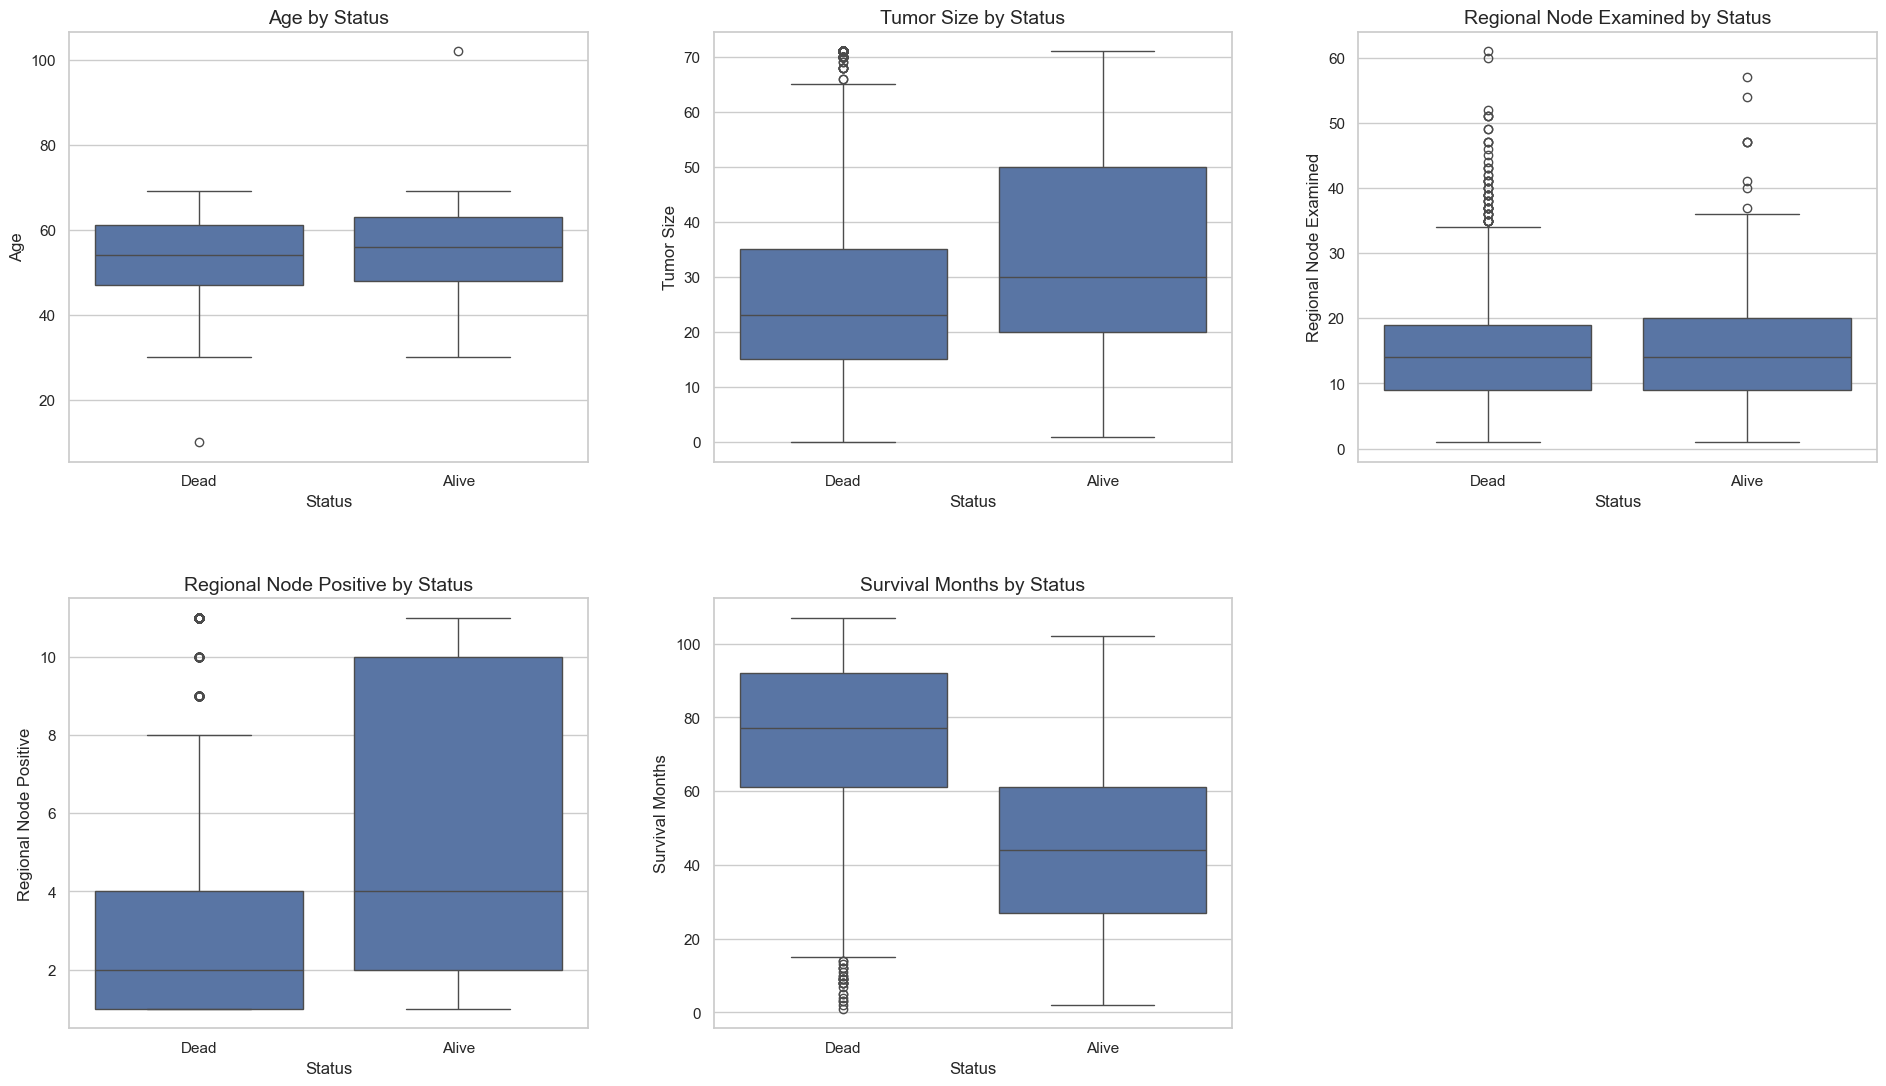

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set visual style
sns.set(style="whitegrid")

# Define numerical columns and response variable
numeric_cols = ['Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # 2 rows, 3 columns for layout

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create a boxplot for each numeric variable
for i, col in enumerate(numeric_cols):
    sns.boxplot(x="Status", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} by Status", fontsize=14)
    axes[i].set_xlabel("Status", fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Dead', 'Alive'], fontsize=11)

# Remove unused subplot (last one, if any)
if len(numeric_cols) < len(axes):
    for j in range(len(numeric_cols), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout(pad=4.0)

# Show the plot
plt.show()

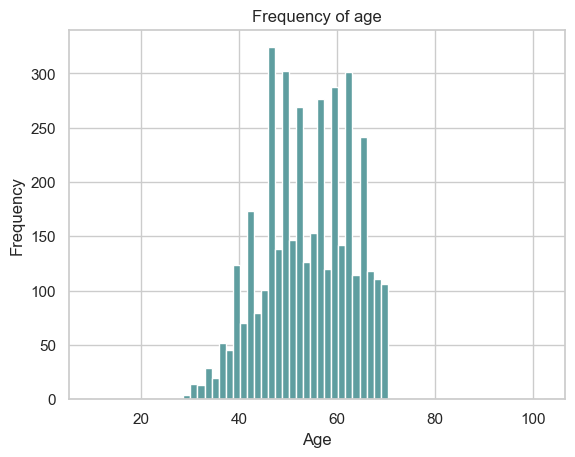

In [31]:
plt.hist(x= df['Age'], bins="sqrt", color="#5F9EA0") #it creates the ranges and the values
plt.title ("Frequency of age")
plt.xlabel ("Age")
plt.ylabel ("Frequency")
  # Adjust the range and step as needed
plt.show ()


C:\Users\emiam\AppData\Local\Temp\ipykernel_3592\3579969739.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, rotation=30, ha='right')


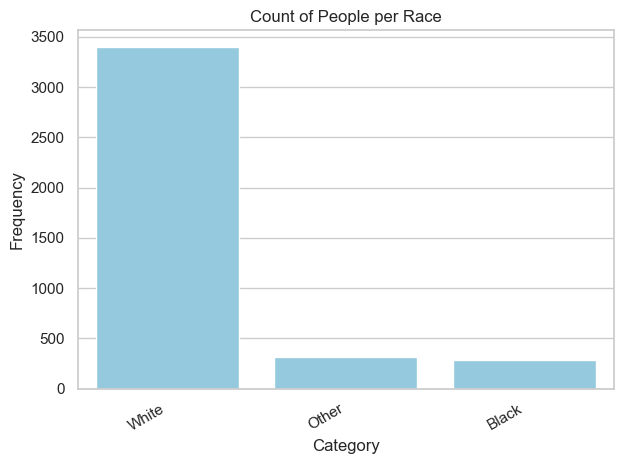

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create graphic
ax = sns.countplot(data=df, x='Race', color='skyblue')

# Obtain original labels
original_labels = [tick.get_text() for tick in ax.get_xticklabels()]

# Replace label for 'Other' if the original includes the string 'Other'
new_labels = ['Other' if 'Other' in label else label for label in original_labels]

# Assign new labels
ax.set_xticklabels(new_labels, rotation=30, ha='right')

# Add titles and labels
plt.title('Count of People per Race')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Show graph
plt.tight_layout()
plt.show()


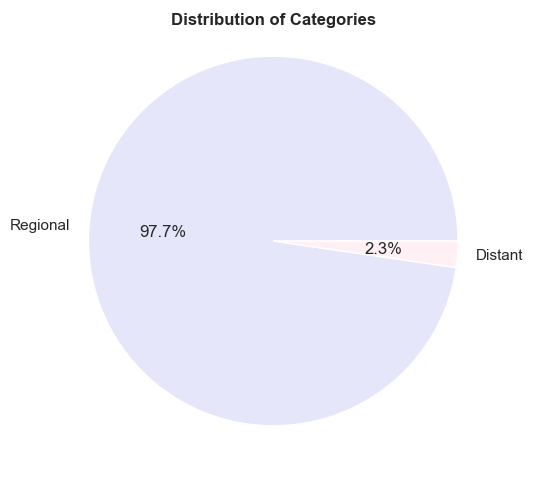

In [33]:
# Count the occurrences of each category in T Stage
category_counts = df['A Stage'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Optional: adjust figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['lavender', 'lavenderblush'])

# Customize the plot
plt.title('Distribution of Categories', y = 0.95, fontweight='bold')

# Show the plot
plt.show()

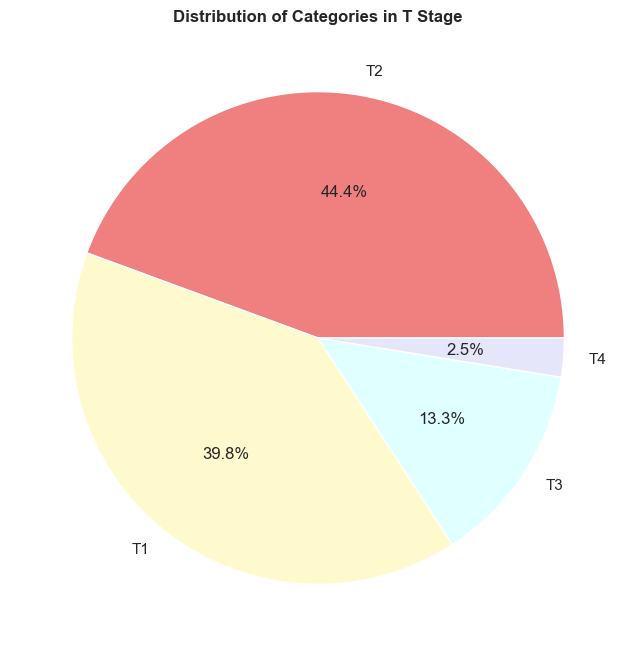

In [34]:
# Map of coding of the variable ‘Grade’
grade_mapping = {
    0: 'T1',
    1: 'T2',
    2: 'T3',
    3: 'T4'
}

# Count the occurrences of each category in T Stage
category_counts = df['T Stage'].value_counts()
present_keys = category_counts.index.tolist()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(category_counts, labels=[grade_mapping[i] for i in present_keys], autopct='%1.1f%%', colors=['lightcoral', 'lemonchiffon', 'lightcyan', 'lavender'])

# Customize the plot
plt.title('Distribution of Categories in T Stage',y = 1, fontweight='bold')

# Show the plot
plt.show()


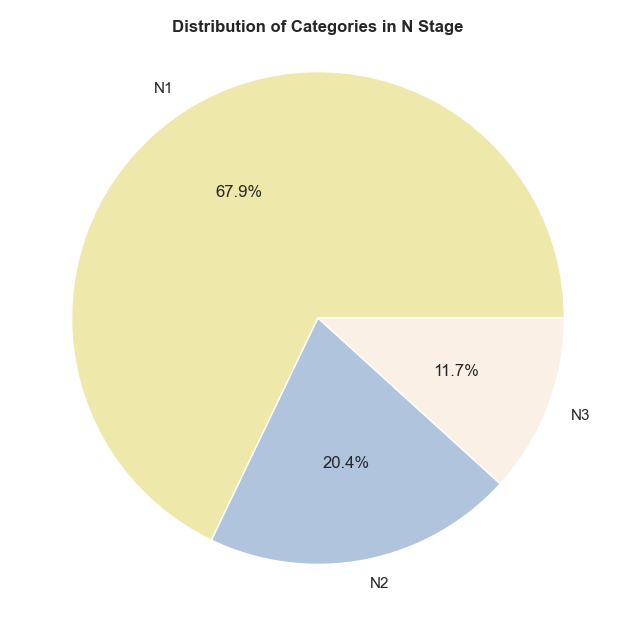

In [35]:
# Map of coding of the variable ‘Grade’
grade_mapping = {
    0: 'N1',
    1: 'N2',
    2: 'N3'
}

# Count the occurrences of each category in N Stage
category_counts = df['N Stage'].value_counts()
present_keys = category_counts.index.tolist()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(category_counts, labels=[grade_mapping[i] for i in present_keys], autopct='%1.1f%%', colors=['palegoldenrod', 'lightsteelblue', 'linen'])  

# Customize the plot
plt.title('Distribution of Categories in N Stage', y = 0.95, fontweight='bold')

# Show the plot
plt.show()

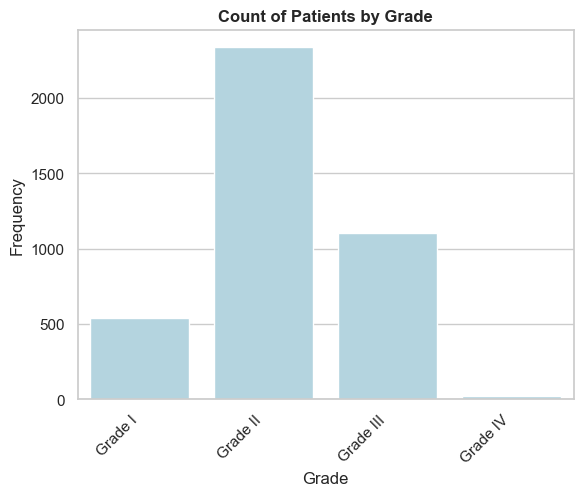

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map of coding of the variable ‘Grade’
grade_mapping = {
    0: 'Grade I',
    1: 'Grade II',
    2: 'Grade III',
    3: 'Grade IV'
}

# Create a bar chart of the Grade
sns.countplot(data=df, x='Grade', color='lightblue')

# # Modify the x-axis labels to show the meanings
plt.xticks(ticks=range(4), labels=[grade_mapping[i] for i in range(4)], rotation=45, ha='right')

# Customize the plot
plt.title('Count of Patients by Grade', y = 1, fontweight='bold')
plt.xlabel('Grade')
plt.ylabel('Frequency')

# Show the plot
plt.show()


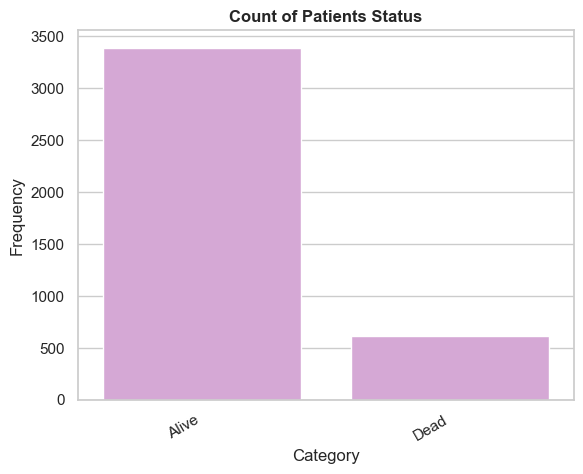

In [37]:
# Create a count plot for the response variable
sns.countplot(data=df, x='Status', color='plum')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=30, ha='right')  # Adjust the angle (e.g., 45 degrees)

# Customize the plot
plt.title('Count of Patients Status',  y = 1, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Show the plot
plt.show()

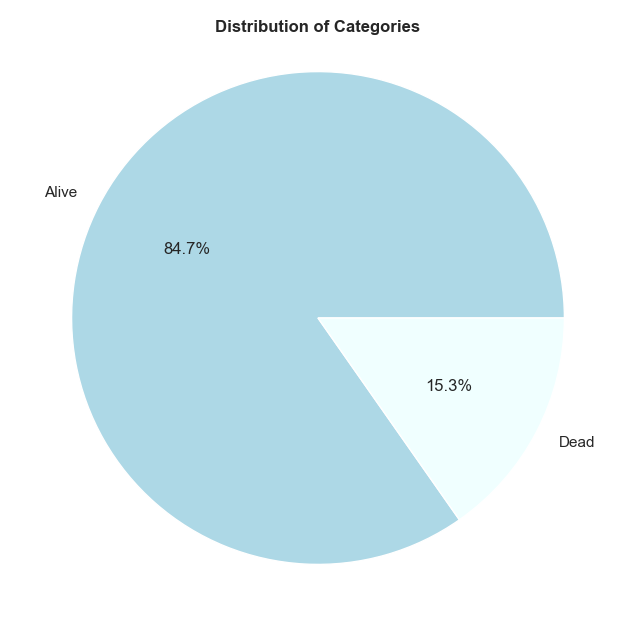

In [38]:
# Count the occurrences of each category in N Stage
category_counts = df['Status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: adjust figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['lightblue', 'azure'])  

# Customize the plot
plt.title('Distribution of Categories',y = 0.95, fontweight='bold')

# Show the plot
plt.show()

# Divide the data set in training, validation, and test set.

In [39]:
# Select the predictive and response variable
X = df_final
y = df['Status']  # Corrected the column name 'Status'

# Split the dataset into training (60%), testing (20%) and validation (20%) sets
# First, split into training (50%) and temporary (50%) sets
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.4, random_state = 42, stratify = y)

# Then, split the temporary set into validation (50%) and test (50%) sets (20% of total for validation, 20% for test)
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, test_size=0.5, random_state = 42, stratify= temp_y)

# Check the partition of the data is correct
print('Training data 60%:', train_X.shape, train_y.shape)
print('Validation data 20%:', valid_X.shape, valid_y.shape)
print('Test data 20%:', test_X.shape, test_y.shape)

Training data 60%: (2400, 18) (2400,)
Validation data 20%: (800, 18) (800,)
Test data 20%: (801, 18) (801,)


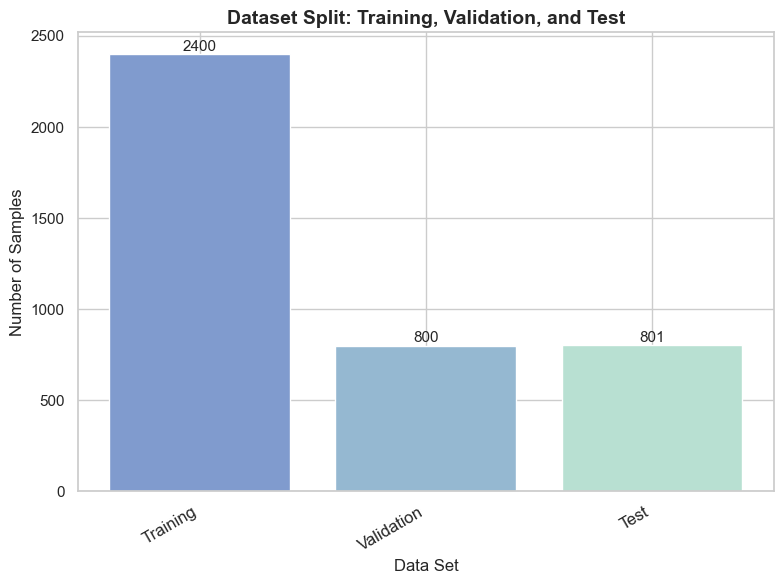

In [40]:
# Set sizes
train_size = train_X.shape[0]
valid_size = valid_X.shape[0]
test_size = test_X.shape[0]

# Name for each set
data_labels = ['Training', 'Validation', 'Test']
data_sizes = [train_size, valid_size, test_size]

# Create a bar chart of Dataset Split
plt.figure(figsize=(8, 6))
plt.xticks(rotation=30, ha='right', fontsize = 12)  
bars = plt.bar(data_labels, data_sizes, color=['#809bce', '#95b8d1', '#b8e0d2'])

# Add the values above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, str(height),
             ha='center', va='bottom', fontsize=11)

# Customize the plot
plt.title('Dataset Split: Training, Validation, and Test', y = 1, fontweight='bold', fontsize = 14)
plt.xlabel('Data Set')
plt.ylabel('Number of Samples')
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
# Convert the list to a DataFrame
train_y_df = pd.DataFrame(train_y, columns=['Status'])
valid_y_df = pd.DataFrame(valid_y, columns=['Status'])
test_y_df = pd.DataFrame(test_y, columns=['Status'])
train_y_df.head()

,Status
876,Alive
886,Alive
590,Alive
555,Alive
1420,Alive


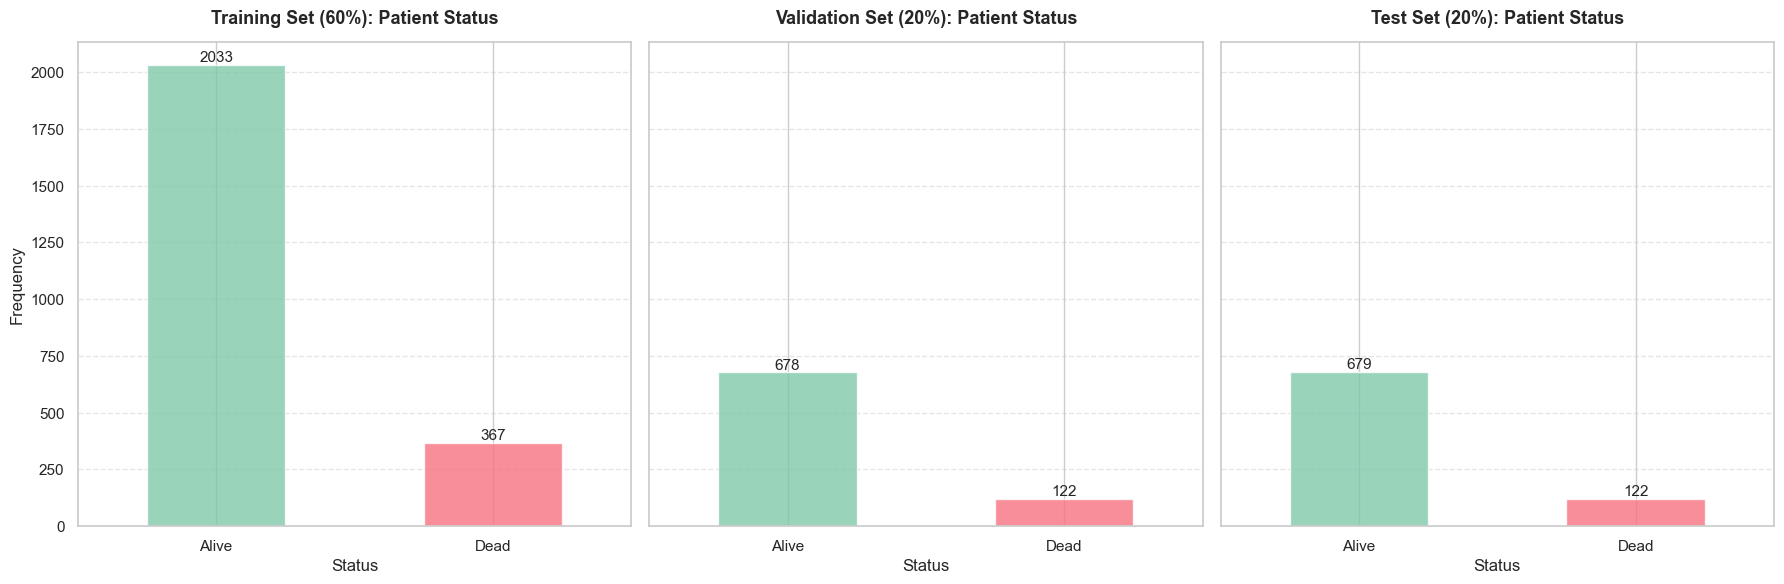

In [42]:
import matplotlib.pyplot as plt

# Get counts of 'Alive' and 'Dead' in each dataset
train_counts = train_y_df['Status'].value_counts()
valid_counts = valid_y_df['Status'].value_counts()
test_counts = test_y_df['Status'].value_counts()

# Create a figure with 3 subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# List of count data and titles for each subplot
datasets = [train_counts, valid_counts, test_counts]
titles = ['Training Set (60%)', 'Validation Set (20%)', 'Test Set (20%)']
colors = ['#7fc8a9', '#f67280'] 

# Loop through each dataset and create its corresponding subplot
for i, ax in enumerate(axes):
    # Plot a bar chart for the current dataset
    bars = datasets[i].plot(kind="bar", stacked=True, alpha=0.8, ax=ax, color=colors)
    
    # Set a title for the current subplot
    ax.set_title(f'{titles[i]}: Patient Status', fontsize=13, fontweight='bold', y=1.02)

    # Set x-axis label
    ax.set_xlabel('Status', fontsize=12)
    
    # Set y-axis label only for the first subplot
    if i == 0:
        ax.set_ylabel('Frequency', fontsize=12)
    
    # Customize x-tick labels (Alive, Dead)
    ax.set_xticks(range(len(datasets[i].index)))
    ax.set_xticklabels(datasets[i].index, rotation=0, fontsize=11)
    
    # Add horizontal grid lines to improve readability
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Add the count above each bar
    for j, value in enumerate(datasets[i]):
        ax.text(j, value + 1, str(value), ha='center', va='bottom', fontsize=11)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Unbalanced data
### Apply just to training set

###  SMOTE
Method to perform over-sampling

The code was extracted from:

SMOTE — Version 0.13.0. (n.d.). https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [43]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Verify the original distribution
print('Original training distribution:', Counter(train_y))

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(train_X, train_y)

# Verify the new distribution
print('Balanced distribution:', Counter(y_res))

Original training distribution: Counter({'Alive': 2033, 'Dead': 367})
Balanced distribution: Counter({'Alive': 2033, 'Dead': 2033})


###  RUS
Under-sample the majority class(es) by randomly picking samples with or without replacement.

The code was extracted from:

RandomUnderSampler — Version 0.13.0. (n.d.). https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

In [44]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# # Verify the original distribution
print('Original distribution:', Counter(train_y))

# Apply RUS
rus = RandomUnderSampler(random_state=42)
X_res1, y_res1 = rus.fit_resample(train_X, train_y)

# Verify the new distribution
print('Balanced distribution:', Counter(y_res1))

Original distribution: Counter({'Alive': 2033, 'Dead': 367})
Balanced distribution: Counter({'Alive': 367, 'Dead': 367})


# Machine learning

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedKFold
import numpy as np

# Setup for repeated K-Fold Cross-Validation (10 splits, repeated 3 times)
kf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# Initialize the logistic regression model
logit_model = LogisticRegression(penalty=None, solver='newton-cg', max_iter=1000)

# Dictionary to store accuracy scores for each sampling method
accuracy_results = {}

# Evaluation with SMOTE
print('SMOTE Logistic Regression with 10-Fold CV')
scores_smote = cross_val_score(logit_model, X_res, y_res, cv=kf, scoring='accuracy')
accuracy_results['SMOTE'] = scores_smote  # Save fold scores to the dictionary
print('Accuracy per fold (SMOTE):', np.round(scores_smote, 4))
print('Average accuracy (SMOTE):', round(scores_smote.mean(), 4))

# Evaluation with RUS
print('RUS Logistic Regression with 10-Fold CV')
scores_rus = cross_val_score(logit_model, X_res1, y_res1, cv=kf, scoring='accuracy')
accuracy_results['RUS'] = scores_rus  # Save fold scores to the dictionary
print('Accuracy per fold (RUS):', np.round(scores_rus, 4))
print('Average accuracy (RUS):', round(scores_rus.mean(), 4))

SMOTE Logistic Regression with 10-Fold CV
Accuracy per fold (SMOTE): [0.8477 0.8501 0.8698 0.8501 0.8477 0.8305 0.8522 0.8227 0.8374 0.8325
 0.8403 0.8452 0.8182 0.8575 0.8575 0.828  0.835  0.8793 0.8177 0.8621
 0.8256 0.8477 0.86   0.8428 0.8354 0.855  0.8645 0.8128 0.8645 0.8276]
Average accuracy (SMOTE): 0.8439
RUS Logistic Regression with 10-Fold CV
Accuracy per fold (RUS): [0.8108 0.7162 0.7973 0.7297 0.7397 0.7945 0.8767 0.8219 0.8219 0.7808
 0.7838 0.7973 0.8243 0.8243 0.7534 0.7397 0.8219 0.7671 0.7534 0.7671
 0.7568 0.7432 0.8243 0.7432 0.8219 0.8219 0.8082 0.7671 0.7397 0.7808]
Average accuracy (RUS): 0.7843


## Statistical analysis

### Hypothesis to normal distribution

$ H_0 $: The per fold accuracy data for each technique are from a population that follows a normal distribution.


$ H_a $: The per fold accuracy data for each technique are not from a population that follows a normal distribution.

### Hypothesis to compare SMOTE and RUS
*Null Hypothesis (H₀):* There is no significant difference between the means.

$ Ho $: $\mu_S = \mu_R$

*Alternative Hypothesis (H₁):* There is a significant difference between the means.

$ Ha $: $\mu_S \neq \mu_R$

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm, shapiro, probplot

# Accuracy results (converted to percentages)
SMOTE = accuracy_results['SMOTE'] * 100
RUS = accuracy_results['RUS'] * 100

# Normality test using Shapiro-Wilk
stat_shapiro1, p_value_shapiro1 = shapiro(SMOTE)
stat_shapiro2, p_value_shapiro2 = shapiro(RUS)

# Significance level
ALPHA = 0.05

# Decision based on p-value for SMOTE (Shapiro-Wilk test)
if p_value_shapiro1 < ALPHA:
    decision_shapiro1 = "There is enough evidence to reject the null hypothesis (Shapiro-Wilk). The accuracy data does not follow a normal distribution."
else:
    decision_shapiro1 = "There is not enough evidence to reject the null hypothesis (Shapiro-Wilk). The accuracy data follows a normal distribution."

# Decision based on p-value for RUS (Shapiro-Wilk test)
if p_value_shapiro2 < ALPHA:
    decision_shapiro2 = "There is enough evidence to reject the null hypothesis (Shapiro-Wilk). The accuracy data does not follow a normal distribution."
else:
    decision_shapiro2 = "There is not enough evidence to reject the null hypothesis (Shapiro-Wilk). The accuracy data follows a normal distribution."

# Print results
print("Shapiro-Wilk Statistic (SMOTE):", round(stat_shapiro1, 4))
print("p-value (Shapiro-Wilk, SMOTE):", round(p_value_shapiro1, 4))
print(decision_shapiro1)

print("Shapiro-Wilk Statistic (RUS):", round(stat_shapiro2, 4))
print("p-value (Shapiro-Wilk, RUS):", round(p_value_shapiro2, 4))
print(decision_shapiro2)

Shapiro-Wilk Statistic (SMOTE): 0.9842
p-value (Shapiro-Wilk, SMOTE): 0.9229
There is not enough evidence to reject the null hypothesis (Shapiro-Wilk). The accuracy data follows a normal distribution.
Shapiro-Wilk Statistic (RUS): 0.9449
p-value (Shapiro-Wilk, RUS): 0.1235
There is not enough evidence to reject the null hypothesis (Shapiro-Wilk). The accuracy data follows a normal distribution.


In [47]:
from scipy.stats import t, ttest_rel
import numpy as np

# Paired t-test setup
alpha = 0.05
mu = 0  # Hypothesized mean difference

# Convert accuracy to percentages (optional)
data1 = accuracy_results['SMOTE'] * 100
data2 = accuracy_results['RUS'] * 100

# Compute differences
dif = data1 - data2
db = np.mean(dif)               # Mean difference
s = np.std(dif, ddof=1)         # Standard deviation of differences
n = len(dif)
gl = n - 1                      # Degrees of freedom

# Two-tailed critical t value
t_crit = t.ppf(1 - alpha/2, gl)

# Obtained t-statistic
t_obt = (db - mu) / (s / np.sqrt(n))

# Compute two-tailed p-value manually
p_value = 2 * (1 - t.cdf(abs(t_obt), df=gl))

# Alternatively, using scipy's built-in paired t-test:
# t_obt, p_value = ttest_rel(data1, data2)

# Print results
print('Paired t-test results')
print('Mean difference =', round(db, 4))
print('t crítico =', round(t_crit, 4))
print('t obtenido =', round(t_obt, 4))
print('p-value =', round(p_value, 10))

if p_value < alpha:
    print("Reject H₀: There is a significant difference.")
else:
    print("Do not reject H₀: No significant difference.")


Paired t-test results
Mean difference = 5.9593
t crítico = 2.0452
t obtenido = 7.7666
p-value = 1.45e-08
Reject H₀: There is a significant difference.


In [48]:
#Print the average to chose the best
print('Average accuracy (SMOTE):', round(scores_smote.mean(), 4))
print('Average accuracy (RUS):', round(scores_rus.mean(), 4))

Average accuracy (SMOTE): 0.8439
Average accuracy (RUS): 0.7843


# Prediction

### XGBoost Algorithm

In [49]:
# Import specific libraries for the algorithm
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.metrics import confusion_matrix

In [50]:
# Convert string labels to numeric: 0 = Alive, 1 = Dead
y_res = y_res.replace({'Alive': 0, 'Dead': 1})
test_y = test_y.replace({'Alive': 0, 'Dead': 1})

# Create the model with the adjusted hyperparameters
# (e.g., "Hybrid XGBoost model with hyperparameter tuning for prediction of liver disease by Dalal et al., 2022")
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    tree_method='auto',           # Automatic choice of best tree method
    eta=0.3,                      # Learning rate (default from the paper)
    max_depth=6,                  # Max depth per tree (from document)
    min_child_weight=1,           # Minimum sum of instance weight needed in a child
    gamma=0,                      # Minimum loss reduction for a split
    subsample=1,                  # Use all data (limited samples mentioned)
    colsample_bytree=1,           # Use all features per tree
    reg_lambda=1,                 # L2 regularization (stability, less overfitting)
    reg_alpha=0,                  # L1 regularization (sparse features)
    n_estimators=10,              # Number of boosting rounds (from text)
    eval_metric='auc'             # AUC is used as evaluation metric (from document)
)

# Fit the model with SMOTE
model.fit(X_res, y_res)

# Make predictions on the test set
ypred = model.predict(test_X)

# Show a comparison table
comparison3 = pd.DataFrame({'Actual': test_y, 'Predicted': ypred})

# Create a copy for display with text labels
comparison3_mapped = comparison3.copy()
comparison3_mapped['Actual'] = comparison3_mapped['Actual'].map({0: 'Alive', 1: 'Dead'})
comparison3_mapped['Predicted'] = comparison3_mapped['Predicted'].map({0: 'Alive', 1: 'Dead'})

print("\nComparison (0 = Alive, 1 = Dead):")
print(comparison3_mapped.head(10))


Comparison (0 = Alive, 1 = Dead):
     Actual Predicted
1246  Alive     Alive
1832  Alive     Alive
2613  Alive     Alive
3016  Alive     Alive
3316  Alive      Dead
3520   Dead      Dead
1248  Alive     Alive
55    Alive     Alive
2180  Alive     Alive
3346  Alive     Alive


C:\Users\emiam\AppData\Local\Temp\ipykernel_3592\3031767506.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_res = y_res.replace({'Alive': 0, 'Dead': 1})
C:\Users\emiam\AppData\Local\Temp\ipykernel_3592\3031767506.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_y = test_y.replace({'Alive': 0, 'Dead': 1})


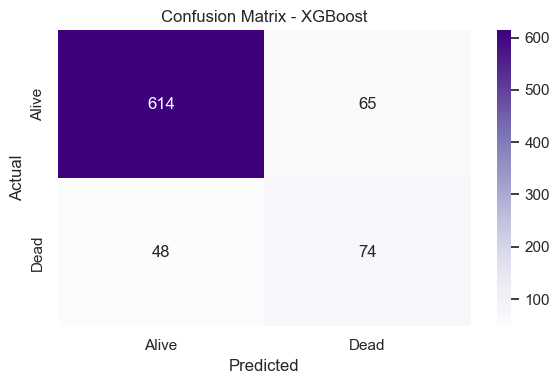


Classification Report:
              precision    recall  f1-score   support

       Alive       0.93      0.90      0.92       679
        Dead       0.53      0.61      0.57       122

    accuracy                           0.86       801
   macro avg       0.73      0.76      0.74       801
weighted avg       0.87      0.86      0.86       801


Accuracy Score: 0.8589263420724095


In [52]:
from sklearn.metrics import confusion_matrix

# Generate and display the confusion matrix
cm = confusion_matrix(test_y, ypred)
labels = ['Alive', 'Dead']  # Text labels for plotting

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()

# Display precision, recall, f1-score report
print("\nClassification Report:")
print(classification_report(test_y, ypred, target_names=['Alive', 'Dead']))

# Calculate and print accuracy
print("\nAccuracy Score:", accuracy_score(test_y, ypred))


In [53]:
# Revert from 0/1 to 'Alive'/'Dead'.
y_res = y_res.replace({0: 'Alive', 1: 'Dead'})
test_y = test_y.replace({0: 'Alive', 1: 'Dead'})

### CastBoost Algorithm

In [54]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Create the model with the adjusted hyperparameters
# Based on: Zamzam et al. (2024), "Comparison of CatBoost and Random Forest Methods for Lung Cancer Classification"
model1 = CatBoostClassifier(
    learning_rate=0.61185806,     # Controls the step size during learning.
    depth=10,                     # Maximum tree depth.
    iterations=100,               # Total number of trees (boosting rounds).
    l2_leaf_reg=0.1,              # L2 regularization to reduce overfitting.
    border_count=255,             # Number of splits for numeric features.
    subsample=0.1,                # Fraction of samples per tree (adds randomness).
    colsample_bylevel=0.1,        # Fraction of features per tree level.
    loss_function='Logloss',      # Loss function for binary classification.
    verbose=False                 # Suppress training output.
)

# Fit it
model1.fit(X_res, y_res)

# Make predictions on the test set
ypred1 = model1.predict(test_X)

# Calculate and print accuracy
print("\nAccuracy Score:", accuracy_score(test_y, ypred1))

# Create a comparison table between actual and predicted values
comparison4 = pd.DataFrame({'Actual': test_y, 'Predicted': ypred1})
print("\nComparison:")
print(comparison4.head(10))



Accuracy Score: 0.8352059925093633

Comparison:
     Actual Predicted
1246  Alive     Alive
1832  Alive     Alive
2613  Alive     Alive
3016  Alive     Alive
3316  Alive     Alive
3520   Dead      Dead
1248  Alive     Alive
55    Alive     Alive
2180  Alive     Alive
3346  Alive     Alive


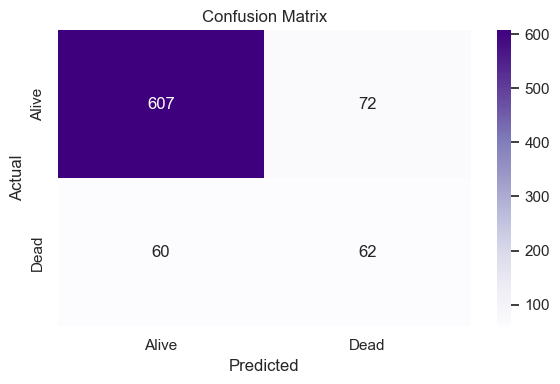


Classification Report:
              precision    recall  f1-score   support

       Alive       0.91      0.89      0.90       679
        Dead       0.46      0.51      0.48       122

    accuracy                           0.84       801
   macro avg       0.69      0.70      0.69       801
weighted avg       0.84      0.84      0.84       801


Accuracy Score: 0.8352059925093633


In [60]:
# Create the confusion matrix
cm1 = confusion_matrix(test_y, ypred1)
labels = model1.classes_  # This gets ['Alive', 'Dead'] if those are your labels

# Plot with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(test_y, ypred1))

print("\nAccuracy Score:", accuracy_score(test_y, ypred1))

### Random Forests Algorithm

In [61]:
# Import specific libraries for the algorithm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Grid search

In [62]:
# Import libraries for grid search and random search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [63]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],         # number of trees
    'max_depth': [None, 10, 20, 30],         # max depth of the tree
    'min_samples_split': [2, 5, 10],         # min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],           # min samples at a leaf node
    'max_features': ['sqrt', 'log2'],        # number of features to consider at each split
    'bootstrap': [True, False]               # whether bootstrap samples are used
}

In [64]:
rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_res, y_res)

print("Best Parameters:")
print(grid_search_rf.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters:
{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Random Search

In [65]:
# Correct parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    error_score='raise'  #  forces traceback if something is wrong
)

# Fit it
random_search.fit(X_res, y_res)

# Results
print("Best Parameters from Random Search:")
print(random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters from Random Search:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [66]:
#best_params = grid_search_rf.best_params_ 
best_params = random_search.best_params_ 
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_res, y_res)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

In [67]:
# Obtain the predictions with test set
y_pred = rf_best.predict(test_X)

# Compare with actual values
comparison = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})
print("\nComparison of actual and predicted values:")
print(comparison.head(10))


Comparison of actual and predicted values:
     Actual Predicted
1246  Alive     Alive
1832  Alive     Alive
2613  Alive     Alive
3016  Alive     Alive
3316  Alive     Alive
3520   Dead      Dead
1248  Alive     Alive
55    Alive     Alive
2180  Alive     Alive
3346  Alive     Alive


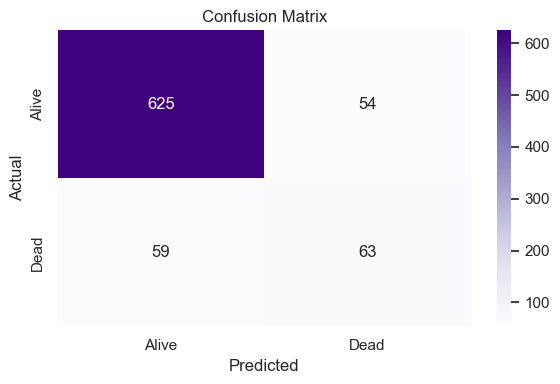


Classification Report:
              precision    recall  f1-score   support

       Alive       0.91      0.92      0.92       679
        Dead       0.54      0.52      0.53       122

    accuracy                           0.86       801
   macro avg       0.73      0.72      0.72       801
weighted avg       0.86      0.86      0.86       801


Accuracy Score: 0.8589263420724095


In [68]:
# Create the confusion matrix
cm = confusion_matrix(test_y, y_pred)
labels = rf_best.classes_  # This gets ['Alive', 'Dead'] if those are your labels

# Plot with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(test_y, y_pred))

print("\nAccuracy Score:", accuracy_score(test_y, y_pred))

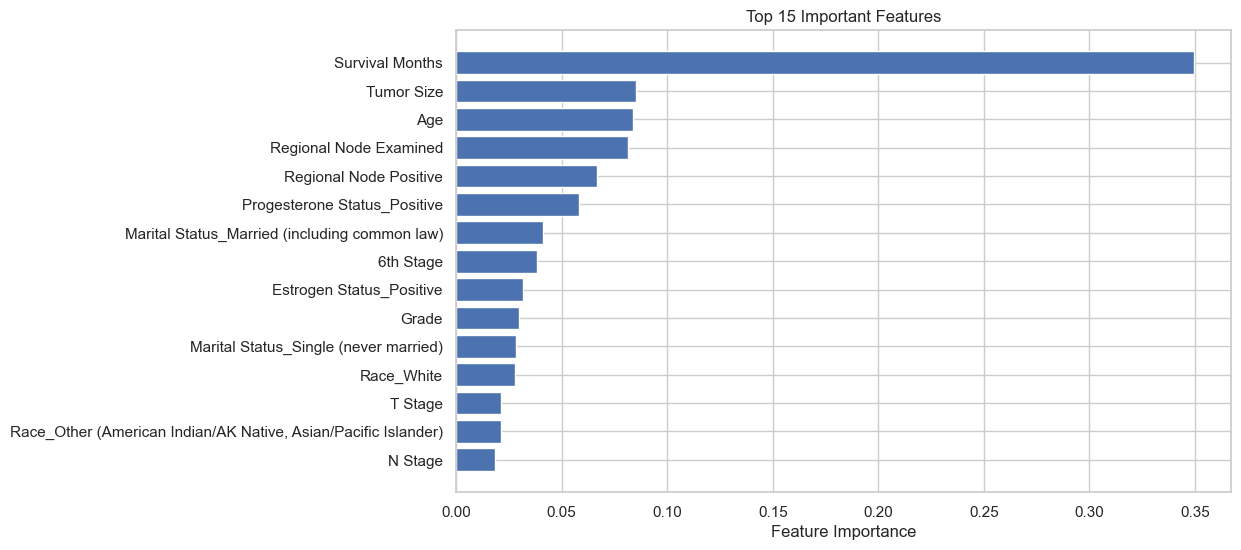

In [69]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_best.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'][:15], importance_df['Importance'][:15])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features")
plt.gca().invert_yaxis()
plt.show()

### Gradient boosting classifier

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'max_depth': [3, 5, 7],                 # Depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples at a leaf node
    'subsample': [1.0, 0.8, 0.6]            # Fraction of samples used for fitting each base learner
}

Grid Search

In [71]:
# Instantiate model
gb_model = GradientBoostingClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit model
grid_search.fit(X_res, y_res)

# Best parameters
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters from Grid Search:
{'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.6}


Random Search

In [72]:
from scipy.stats import uniform, randint

# Random Search
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid,
    n_iter=50,            # Number of random combinations to try
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(X_res, y_res)

# Best parameters
print("Best Parameters from Random Search:")
print(random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters from Random Search:
{'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.2}


In [73]:
best_params = grid_search.best_params_ 
#best_params = random_search.best_params_ 
gb_best = GradientBoostingClassifier(**best_params, random_state=42)
gb_best.fit(X_res, y_res)

accuracy = gb_best.score(test_X, test_y)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8564


In [74]:
#best_params = grid_search.best_params_ 
best_params = random_search.best_params_ 
gb_best = GradientBoostingClassifier(**best_params, random_state=42)
gb_best.fit(X_res, y_res)

accuracy = gb_best.score(test_X, test_y)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8552


In [75]:
# Obtain the predictions with test set
y_pred2 = gb_best.predict(test_X)

# Compare with actual values
comparison2 = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred2})
print("\nComparison of actual and predicted values:")
print(comparison2.head(10))


Comparison of actual and predicted values:
     Actual Predicted
1246  Alive     Alive
1832  Alive     Alive
2613  Alive     Alive
3016  Alive     Alive
3316  Alive      Dead
3520   Dead      Dead
1248  Alive     Alive
55    Alive     Alive
2180  Alive     Alive
3346  Alive     Alive


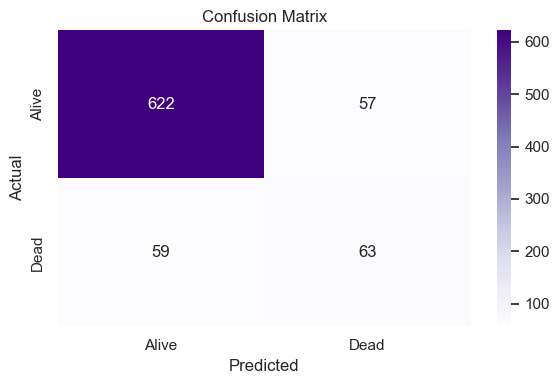


Classification Report:
              precision    recall  f1-score   support

       Alive       0.91      0.92      0.91       679
        Dead       0.53      0.52      0.52       122

    accuracy                           0.86       801
   macro avg       0.72      0.72      0.72       801
weighted avg       0.85      0.86      0.85       801


Accuracy Score: 0.8551810237203495


In [76]:
# Create the confusion matrix
cm = confusion_matrix(test_y, y_pred2)
labels = gb_best.classes_  # This gets ['Alive', 'Dead'] 

# Plot with seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(test_y, y_pred2))

print("\nAccuracy Score:", accuracy_score(test_y, y_pred2))


--- Random Forest | Train ---
Accuracy: 1.0000
Sensitivity (Recall for 'Dead'): 1.0000
Specificity: 1.0000
Precision: 1.0000
AUC: 1.0000
Confusion Matrix:
[[2033    0]
 [   0  367]]

--- Random Forest | Validation ---
Accuracy: 0.8888
Sensitivity (Recall for 'Dead'): 0.5738
Specificity: 0.9454
Precision: 0.6542
AUC: 0.8408
Confusion Matrix:
[[641  37]
 [ 52  70]]

--- Random Forest | Test ---
Accuracy: 0.8589
Sensitivity (Recall for 'Dead'): 0.5164
Specificity: 0.9205
Precision: 0.5385
AUC: 0.8182
Confusion Matrix:
[[625  54]
 [ 59  63]]


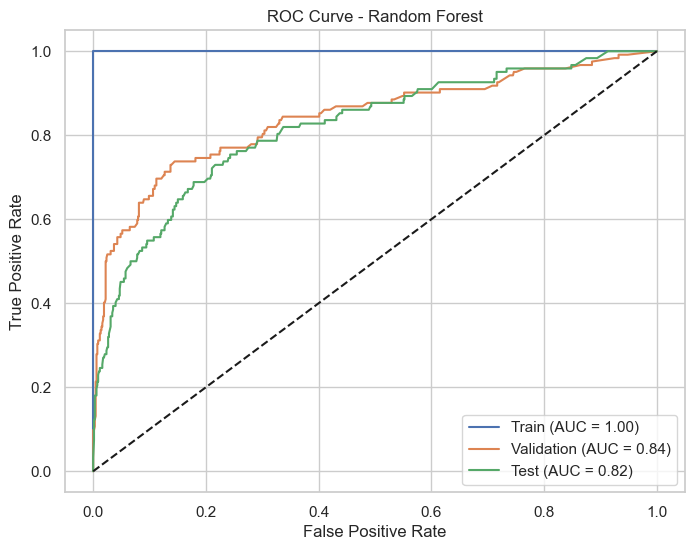


--- Gradient Boosting | Train ---
Accuracy: 1.0000
Sensitivity (Recall for 'Dead'): 1.0000
Specificity: 1.0000
Precision: 1.0000
AUC: 1.0000
Confusion Matrix:
[[2033    0]
 [   0  367]]

--- Gradient Boosting | Validation ---
Accuracy: 0.8875
Sensitivity (Recall for 'Dead'): 0.5738
Specificity: 0.9440
Precision: 0.6481
AUC: 0.8278
Confusion Matrix:
[[640  38]
 [ 52  70]]

--- Gradient Boosting | Test ---
Accuracy: 0.8552
Sensitivity (Recall for 'Dead'): 0.5164
Specificity: 0.9161
Precision: 0.5250
AUC: 0.8054
Confusion Matrix:
[[622  57]
 [ 59  63]]


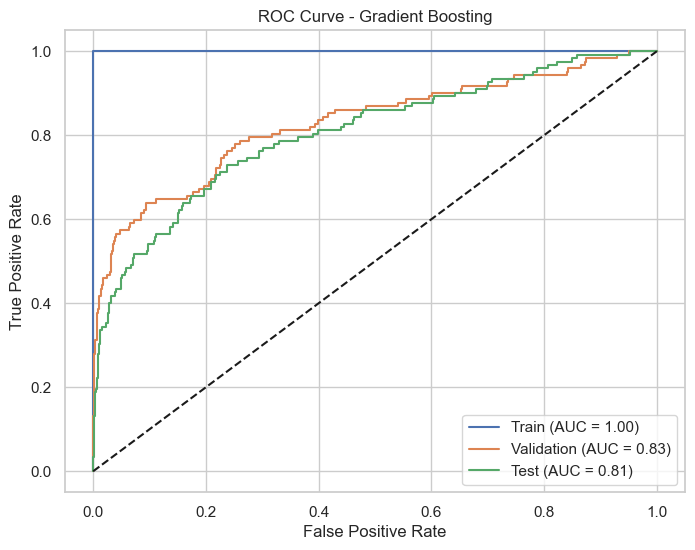


--- CatBoost | Train ---
Accuracy: 0.9750
Sensitivity (Recall for 'Dead'): 0.9155
Specificity: 0.9857
Precision: 0.9205
AUC: 0.9940
Confusion Matrix:
[[2004   29]
 [  31  336]]

--- CatBoost | Validation ---
Accuracy: 0.8700
Sensitivity (Recall for 'Dead'): 0.5656
Specificity: 0.9248
Precision: 0.5750
AUC: 0.8090
Confusion Matrix:
[[627  51]
 [ 53  69]]

--- CatBoost | Test ---
Accuracy: 0.8352
Sensitivity (Recall for 'Dead'): 0.5082
Specificity: 0.8940
Precision: 0.4627
AUC: 0.8021
Confusion Matrix:
[[607  72]
 [ 60  62]]


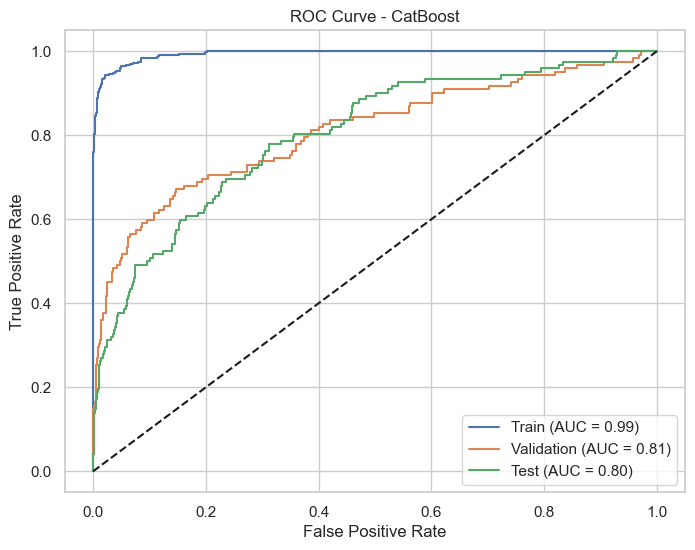

In [77]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, recall_score,
    precision_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X, y, dataset_name, model_name, plot_curves=False):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, list(model.classes_).index('Dead')]

    cm = confusion_matrix(y, y_pred, labels=['Alive', 'Dead'])
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y, y_pred)
    sensitivity = recall_score(y, y_pred, pos_label='Dead')
    specificity = tn / (tn + fp)
    precision = precision_score(y, y_pred, pos_label='Dead')
    auc = roc_auc_score([1 if i == 'Dead' else 0 for i in y], y_prob)
    fpr, tpr, _ = roc_curve([1 if i == 'Dead' else 0 for i in y], y_prob)

    print(f"\n--- {model_name} | {dataset_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Sensitivity (Recall for 'Dead'): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Confusion Matrix:")
    print(cm)

    if plot_curves:
        return fpr, tpr, auc
    else:
        return None, None, auc

# Helper function to plot ROC for a single model
def plot_roc_curves(model, name, train_data, valid_data, test_data):
    plt.figure(figsize=(8, 6))

    for X, y, label in train_data + valid_data + test_data:
        fpr, tpr, auc = evaluate_model(model, X, y, label, name, plot_curves=True)
        plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

# Data tuples: (X, y, label)
train_data = [(train_X, train_y, "Train")]
valid_data = [(valid_X, valid_y, "Validation")]
test_data = [(test_X, test_y, "Test")]

# Plot ROC for Random Forest
plot_roc_curves(rf_best, "Random Forest", train_data, valid_data, test_data)

# Plot ROC for Gradient Boosting
plot_roc_curves(gb_best, "Gradient Boosting", train_data, valid_data, test_data)

# Plot ROC for CatBoost
plot_roc_curves(model1, "CatBoost", train_data, valid_data, test_data)


--- XGBoost | Train ---
Accuracy: 0.9021
Sensitivity (Recall for 'Dead'): 0.7357
Specificity: 0.9321
Precision: 0.6618
AUC: 0.9442
Confusion Matrix:
[[1895  138]
 [  97  270]]

--- XGBoost | Validation ---
Accuracy: 0.8762
Sensitivity (Recall for 'Dead'): 0.6148
Specificity: 0.9233
Precision: 0.5906
AUC: 0.8453
Confusion Matrix:
[[626  52]
 [ 47  75]]

--- XGBoost | Test ---
Accuracy: 0.8589
Sensitivity (Recall for 'Dead'): 0.6066
Specificity: 0.9043
Precision: 0.5324
AUC: 0.8249
Confusion Matrix:
[[614  65]
 [ 48  74]]


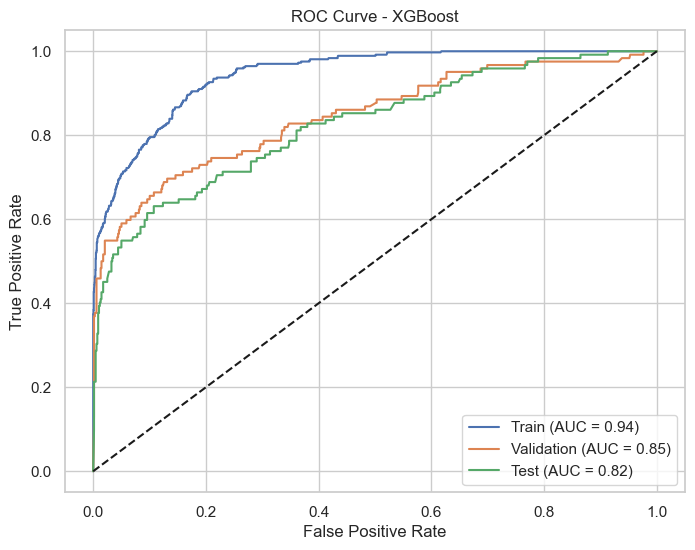

In [78]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, recall_score,
    precision_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluation function for XGBoost (with labels converted to 0 and 1)
def evaluate_model_xgb(model, X, y_original, dataset_name, model_name, plot_curves=False):
    # Convert labels: 'Alive' = 0, 'Dead' = 1
    # This is necessary because XGBoost and other classification metrics require numerical labels.
    # Here, 'Alive' is converted to 0 and 'Dead' to 1 to represent the classes in binary form.
    y = np.where(y_original == 'Alive', 0, 1)

    # Make predictions
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]  # Get the probability for the positive class ('Dead')

    # Confusion matrix calculation
    cm = confusion_matrix(y, y_pred, labels=[0, 1])  # Confusion matrix with labels 0 and 1
    tn, fp, fn, tp = cm.ravel()  # Unpack the confusion matrix into its components

    # Metrics calculations
    accuracy = accuracy_score(y, y_pred)  # Accuracy of the model
    sensitivity = recall_score(y, y_pred, pos_label=1)  # Sensitivity (recall for the 'Dead' class)
    specificity = tn / (tn + fp)  # Specificity
    precision = precision_score(y, y_pred, pos_label=1)  # Precision for the 'Dead' class
    auc = roc_auc_score(y, y_prob)  # Area Under the Curve (AUC)
    fpr, tpr, _ = roc_curve(y, y_prob)  # False Positive Rate and True Positive Rate for ROC curve

    # Print the results of the model
    print(f"\n--- {model_name} | {dataset_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Sensitivity (Recall for 'Dead'): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # If you want to plot the ROC curve, return the necessary values
    if plot_curves:
        return fpr, tpr, auc
    else:
        return None, None, auc

# Function to plot the ROC curve for XGBoost
def plot_xgb_roc(model, train_data, valid_data, test_data):
    plt.figure(figsize=(8, 6))

    # Evaluate the model for each dataset and plot the ROC curve
    for X, y, label in train_data + valid_data + test_data:
        fpr, tpr, auc = evaluate_model_xgb(model, X, y, label, "XGBoost", plot_curves=True)
        plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")

    # Add a reference line for random classification
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve - XGBoost')  # Title for the plot
    plt.xlabel('False Positive Rate')  # X-axis label
    plt.ylabel('True Positive Rate')  # Y-axis label
    plt.legend()  # Show the legend
    plt.grid(True)  # Enable the grid
    plt.show()  # Display the plot

# Define the datasets (ensure the labels have 'Alive'/'Dead')
train_data_xgb = [(train_X, train_y, "Train")]
valid_data_xgb = [(valid_X, valid_y, "Validation")]
test_data_xgb = [(test_X, test_y, "Test")]

# Run the function to plot the ROC
plot_xgb_roc(model, train_data_xgb, valid_data_xgb, test_data_xgb)


### References
- Python Package Introduction — xgboost 3.0.0 documentation. (n.d.). https://xgboost.readthedocs.io/en/stable/python/python_intro.html
- Quick start |. (n.d.). https://catboost.ai/docs/en/concepts/python-quickstart#classification-and-regression
- RandomUnderSampler — Version 0.13.0. (n.d.). https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html SMOTE — Version 0.13.0. (n.d.). https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
- GradientBoostingClassifier. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- RandomForestClassifier. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- 3.1. Cross-validation: evaluating estimator performance. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/cross_validation.html
- Using the Scikit-Learn Estimator Interface — xgboost 3.0.0 documentation. (n.d.). https://xgboost.readthedocs.io/en/stable/python/sklearn_estimator.html